In [20]:
import numpy as np
import seaborn as sns
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

In [2]:
# force the math text to look normal
mpl.rcParams['mathtext.default'] = 'regular'

def major_ticks(x, pos=None):
    """Set the major ticks according 
    to this custom style
    """
    x = mdates.num2date(x)
    if pos == 0:
        fmt = "%-d\n%b %Y\n%I %p"
    else:
        fmt = "%-d"
    return x.strftime(fmt)

# set the default seaborn params
sns.set("paper", "ticks", color_codes=True, palette='colorblind')


In [3]:
#load in the comp data
comp = pd.read_csv('3_factor/res2.csv')
comp.rename(columns={'Unnamed: 0':'species'},inplace=True)
comp
#comp.T.plot(kind='bar')

,species,Factor 1,Factor 2,Factor 3,Residual
0,bin0,0.000000,0.894385,0.106242,-0.000627
1,bin1,0.228201,0.831760,0.000000,-0.059961
2,bin2,0.417905,0.650956,0.000000,-0.068861
3,bin3,0.536352,0.499063,0.000000,-0.035415
4,bin4,0.529529,0.379585,0.091965,-0.001079
5,bin5,0.554334,0.231988,0.196930,0.016748
6,co_diff,0.766997,0.000000,0.233104,-0.000101
7,no_diff,0.291799,0.392044,0.187891,0.128266
8,no2,0.016448,0.048985,0.936950,-0.002384
9,ox_diff,0.000000,0.459077,0.475052,0.065872


In [4]:
comp2 = pd.melt(comp,id_vars='species', value_vars=['Factor 1','Factor 2','Factor 3','Residual'])
comp2

,species,variable,value
0,bin0,Factor 1,0.000000
1,bin1,Factor 1,0.228201
2,bin2,Factor 1,0.417905
3,bin3,Factor 1,0.536352
4,bin4,Factor 1,0.529529
5,bin5,Factor 1,0.554334
6,co_diff,Factor 1,0.766997
7,no_diff,Factor 1,0.291799
8,no2,Factor 1,0.016448
9,ox_diff,Factor 1,0.000000


In [5]:
#load in timeseries data
ts = pd.read_csv('3_factor/timeseries.csv')
ts['localtime'] = pd.to_datetime(ts['localtime']) #convert timestamp column to pandas timestamp format
ts = ts.set_index('localtime',append=False) #setindex as local time
ts.tz_localize('Africa/Kinshasa')
#start = '2022-06-09 23:00'
#fin = '2022-06-12 00:00'
ts = ts.resample('D').mean()
ts

,Unnamed: 0,bin0,bin1,bin2,bin3,bin4,bin5,co_diff,no_diff,no2_diff,ox_diff,Factor 1,Factor 2,Factor 3
localtime,,,,,,,,,,,,,,
2022-05-09,4248.347826,33.970732,3.958825,0.927110,0.178177,0.139509,0.080548,134.549379,11.423292,2.978571,4.344410,0.458962,0.163858,0.413437
2022-05-10,5260.019011,26.930940,3.559023,1.025867,0.232465,0.215039,0.127619,245.407224,11.879848,4.145627,4.547529,0.918857,0.127020,0.419749
2022-05-11,6322.487654,24.527172,3.519267,1.045256,0.263821,0.263804,0.148895,190.216667,17.765741,2.754630,3.762037,0.660949,0.109373,0.642622
2022-05-12,7273.383333,31.810357,3.854583,1.083390,0.255567,0.302507,0.256130,257.295000,12.251667,3.410000,3.230000,0.960983,0.151084,0.434893
2022-05-13,7655.114907,69.773974,11.649852,3.007800,0.667746,0.638377,0.372948,231.104037,8.866149,1.700000,2.904969,0.838206,0.352520,0.310132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,162849.106157,14.130418,2.445980,0.618324,0.148975,0.230908,0.194418,180.642463,9.038004,3.899788,1.367304,0.680030,0.063712,0.318951
2022-11-10,163579.630901,10.951249,1.643178,0.360851,0.060274,0.064906,0.035520,223.876395,20.300858,5.028755,2.300000,0.797459,0.035675,0.734247
2022-11-11,164178.650165,13.183803,2.426721,0.699197,0.202506,0.348990,0.332863,253.612871,11.560396,4.939274,1.332673,0.966928,0.055984,0.406352


In [26]:
nmf = pd.read_csv('3_factor/timeseries.csv')
nmf['localtime'] = pd.to_datetime(nmf['localtime']) #convert timestamp column to pandas timestamp format
nmf= nmf.set_index('localtime',append=False)
#start = '2022-05-10 4:00'
#fin = '2022-11-05 12:00'
#nmf = nmf[start:fin]
nmf = nmf.tz_localize('US/Eastern',ambiguous=False)
nmf = nmf.tz_convert('Africa/Kinshasa')


In [27]:
def diurnal(data, **kwargs):
    """
    """
    cpy = data.copy()
    cpy["_time"] = cpy.index.map(lambda dt: dt.strftime("%H:%M"))
    
    stats = cpy.groupby("_time").describe()
    stats.index = stats.index.map(pd.to_datetime)
    
    # get the column names
    cols = stats.columns.get_level_values(0).unique().values
    
    with sns.axes_style(kwargs.pop('style', 'white')):
        fig, ax = plt.subplots(1, figsize=kwargs.pop('figsize', (10, 6)))
        
        for c in cols:
            ax.plot(stats.index, stats[c]['mean'], label=c, lw=5)
        
        ticks = ax.get_xticks()
        ax.set_xticks(np.linspace(date2num(stats.index[0]), date2num(stats.index[0] + timedelta(hours=24)), 5))
        ax.set_xticks(np.linspace(date2num(stats.index[0]), date2num(stats.index[0] + timedelta(hours=24)), 25), minor=True)

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))

        ax.set_xlim(stats.index[0], stats.index[-1])
        ax.set(yticks=[0, 0.5, 1, 1.5, 2, 2.5], yticklabels=["0", "", "1", "", "2", ""])
        ax.set_ylabel("Factor Signal", fontsize=28)
        ax.legend(loc='upper left')

        ax.grid(None, axis='x')

        ax.set_ylim(0, 2.5)
    
    return ax

In [28]:
cpy = nmf[["Factor 1", "Factor 2", "Factor 3"]].resample('5min').mean().dropna(how='any')

cpy["_ts"] = cpy.index.map(lambda dt: dt.strftime("%H:%M"))

stats = cpy.groupby("_ts").describe()
stats.index = stats.index.map(pd.to_datetime)

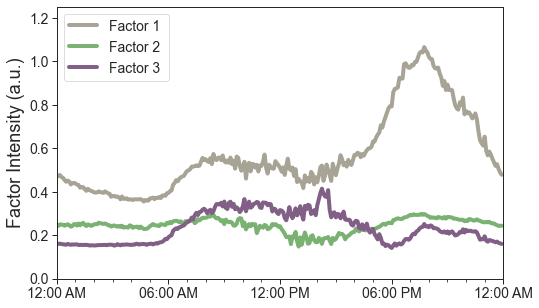

In [29]:
fig, ax = plt.subplots(1, figsize=(8, 5))

ax.plot(stats.index, stats["Factor 1"]["mean"], label="Factor 1 ", lw=4, color=sns.xkcd_rgb['greyish'])
ax.plot(stats.index, stats["Factor 2"]["mean"], label="Factor 2", lw=4, color=sns.xkcd_rgb['faded green'])
ax.plot(stats.index, stats["Factor 3"]["mean"], label="Factor 3", lw=4, color=sns.xkcd_rgb['dusty purple'])

ticks = ax.get_xticks()

ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18, 24]))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%I:%M %p"))
ax.set_xlim(ticks[0], ticks[-1])
ax.set_ylim(0, 1.25)
ax.set_ylabel("Factor Intensity (a.u.)", fontsize=18)

ax.legend(loc='upper left',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

fig.savefig("NMF-diurnal.png", dpi=350)

In [ ]:
# set up the figure
fig = plt.figure(figsize=(9, 8))

    # build a gridspec-based layout
#gs = fig.add_gridspec(1, 5)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)



In [ ]:
# Plot the timeseries

cols_to_plot = [col for col in ts.columns if "Factor" in col]


In [ ]:
ax2.plot(ts[cols_to_plot[0]], lw=1, color=sns.xkcd_rgb['greyish'])
ax2.plot(ts[cols_to_plot[1]], lw=1, color=sns.xkcd_rgb['faded green'])
ax2.plot(ts[cols_to_plot[2]], lw=1, color=sns.xkcd_rgb['dusty purple'])


In [ ]:
   # remove ticks on y axis
ax2.set_ylim(0, 2.5)
ax2.set_xlim(ts.index[0], ts.index[-1])
ax2.set_ylabel("Factor Intensity (a.u.)",fontsize=14)
ax2.legend([
        "Factor 1 ",
        "Factor 2 ",
        "Factor 3 "
    ], loc="upper right")

sns.despine()


In [ ]:
cols = ['bin0', 'bin1', 'bin2','bin3','bin4','bin5','co_diff', 'ox_diff', 'no_diff', 'no2']

pal = sns.color_palette()

colors = [pal[3], pal[2], pal[4], pal[5]]
colors += sns.color_palette("Blues", 6)
colors.reverse()
#colors

In [ ]:
ax1 = sns.barplot(x='variable',y='value',
        data=comp2,
        ax=ax1, hue='species',hue_order=cols,
        palette=colors, saturation=1, edgecolor='black', linewidth=0.25,
        errwidth=.75)


In [ ]:
ax1.set_ylim(0, 1)
ax1.set_xlabel("")
ax1.set_ylabel("Percent of Species Signal\nDescribed by Factor", fontsize=14)
ax1.set(yticks=np.linspace(0, 1, 11), yticklabels=["0","","","","","50","","","","","100"])
ax1.tick_params(axis='both', which='major', labelsize=14)


In [ ]:
handles, _ = ax1.get_legend_handles_labels()
labels = ["Bin 0", "Bin 1", "Bin 2", "Bin 3","Bin 4","Bin 5","CO", "$O_3$", "$NO$", "$NO_2$",]
ax1.legend(handles, labels)


In [ ]:
ax1.set_title('(a)',fontsize=14)
ax2.set_title('(b)',fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=14)


In [ ]:
   # make the plots a bit shorter to make room for the figure sub-labels
#plt.subplots_adjust(top=.5)

    # add some figure text
plt.gcf().text(0.09, 0.9, "(a)", fontsize=12)
plt.gcf().text(0.5, 0.9, "(b)", fontsize=12)

plt.tight_layout()

fig.savefig('time_barchart_full.png', dpi=350)